 # MINI PROJECT ACTIVITY
## PROJECT TITLE : IRIS DATASET [Phase-4]

# Regression


In [105]:
import pandas as pd
df=pd.read_csv("C:/Users/91935/OneDrive/Desktop/Ipec Dataset/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Importing Libraries and Reading the Dataset

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [107]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
df =df.drop('species', axis=1)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [110]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [111]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, 3].values.reshape(-1,1)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [113]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (105, 3)
Shape of X_test:  (45, 3)
Shape of y_train:  (105, 1)
Shape of y_test (45, 1)


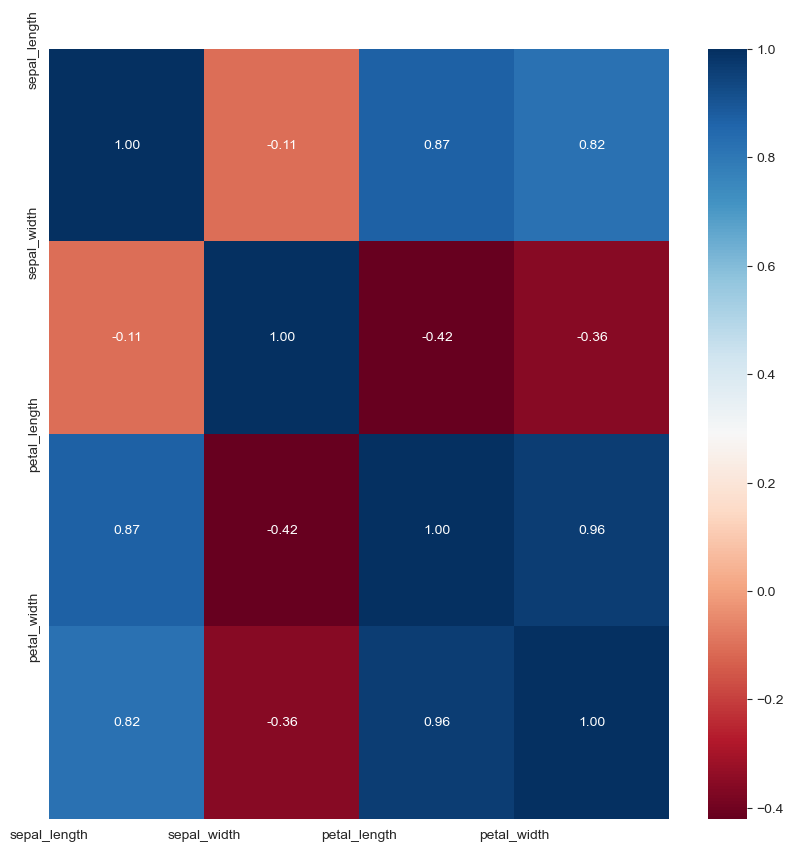

In [114]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

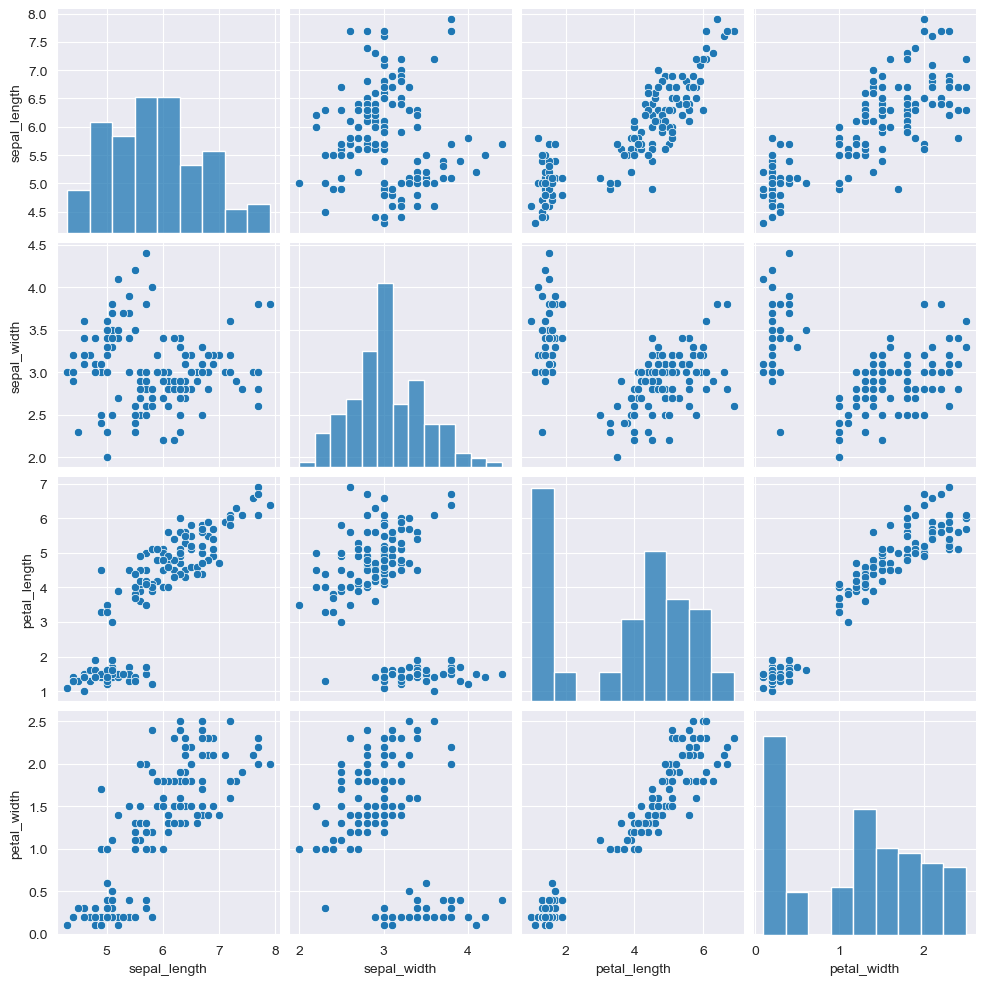

In [115]:
sns.pairplot(df)
plt.show()

# Dimensionality Reduction

## PCA Method

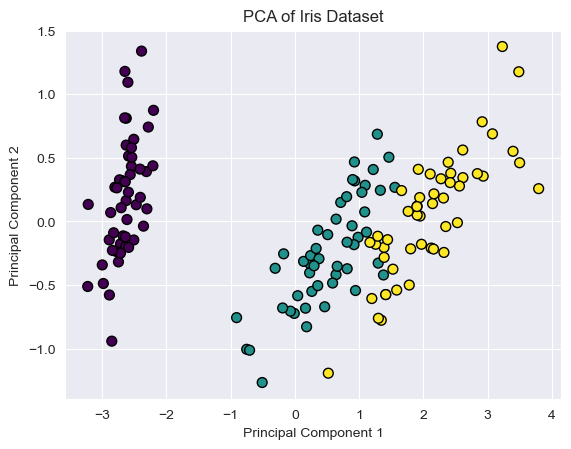

In [135]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA and reduce the data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


# Chi-Square

In [136]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris  # Import the Iris dataset

In [137]:
# Load the Iris dataset
iris = load_iris()

In [138]:
X = iris.data
y = iris.target

In [139]:
# Apply ANOVA F-statistic
f_selector = SelectKBest(f_classif, k='all')
X_f_selected = f_selector.fit_transform(X, y)


In [140]:
# Get the p-values and F-statistics for each feature
p_values = f_selector.pvalues_
f_statistics = f_selector.scores_


In [141]:
# Create a DataFrame to display the results
feature_names = iris.feature_names
result_df = pd.DataFrame({
    'Feature': feature_names,
    'F-statistic': f_statistics,
    'P-value': p_values
})

print(result_df)


             Feature  F-statistic       P-value
0  sepal length (cm)   119.264502  1.669669e-31
1   sepal width (cm)    49.160040  4.492017e-17
2  petal length (cm)  1180.161182  2.856777e-91
3   petal width (cm)   960.007147  4.169446e-85


# Normalization

## MinMaxScaler

In [142]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [143]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [144]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [145]:
# Fit and transform the data
X_normalized = scaler.fit_transform(X)

In [146]:
# Create a DataFrame with the normalized features
df_normalized = pd.DataFrame(data=X_normalized, columns=feature_names)
df_normalized['Target'] = y


In [147]:
# Display the first few rows of the normalized data
print(df_normalized.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


#  Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [149]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.9145415651803701
R2_score (train):  0.9339509732048493
R2_score (test):  0.9443964680105399
RMSE:  0.17327192911974204


## Support Vector Regression

In [150]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [151]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [152]:
X_train = np.array(X_train)
X_train.reshape(-1,1)

array([[5.4],
       [3.7],
       [1.5],
       [5.5],
       [4.2],
       [1.4],
       [6. ],
       [2.9],
       [4.5],
       [5.2],
       [3.5],
       [1.5],
       [5.6],
       [2.8],
       [4.9],
       [7.1],
       [3. ],
       [5.9],
       [5. ],
       [3.4],
       [1.5],
       [4.8],
       [3. ],
       [1.4],
       [6.3],
       [2.9],
       [5.6],
       [5.8],
       [2.7],
       [3.9],
       [5.8],
       [2.8],
       [5.1],
       [6.7],
       [3. ],
       [5.2],
       [5.7],
       [2.8],
       [4.5],
       [6.7],
       [3.3],
       [5.7],
       [5.7],
       [3. ],
       [4.2],
       [6.2],
       [2.8],
       [4.8],
       [6.7],
       [2.5],
       [5.8],
       [5.5],
       [2.4],
       [3.8],
       [5.1],
       [3.8],
       [1.5],
       [6. ],
       [2.2],
       [5. ],
       [6.3],
       [3.3],
       [4.7],
       [6.5],
       [3.2],
       [5.1],
       [5.2],
       [4.1],
       [1.5],
       [5.2],
       [2.7],
      

In [153]:
X_test = np.array(X_test)
X_test.reshape(-1,1)

array([[5.2],
       [3.4],
       [1.4],
       [6.3],
       [2.5],
       [4.9],
       [5.9],
       [3.2],
       [4.8],
       [6. ],
       [3.4],
       [4.5],
       [6.4],
       [2.8],
       [5.6],
       [6.7],
       [3.1],
       [4.4],
       [6.1],
       [3. ],
       [4.9],
       [4.4],
       [3.2],
       [1.3],
       [5.5],
       [2.4],
       [3.7],
       [5. ],
       [2.3],
       [3.3],
       [5.1],
       [3.7],
       [1.5],
       [5.4],
       [3.4],
       [1.5],
       [5. ],
       [3.4],
       [1.6],
       [6.3],
       [2.8],
       [5.1],
       [4.6],
       [3.4],
       [1.4],
       [6.6],
       [2.9],
       [4.6],
       [7.2],
       [3.2],
       [6. ],
       [6.9],
       [3.1],
       [5.4],
       [5.6],
       [2.9],
       [3.6],
       [5.6],
       [2.7],
       [4.2],
       [5.7],
       [2.6],
       [3.5],
       [5.7],
       [2.8],
       [4.1],
       [5.6],
       [3. ],
       [4.5],
       [5.4],
       [3.4],
      

In [154]:
X_scaled = np.array(X_scaled)
X_scaled.reshape(-1,1)

array([[-0.57589892],
       [ 1.44376797],
       [-1.34936786],
       [-0.45147631],
       [ 2.56836468],
       [-1.406846  ],
       [ 0.17063672],
       [-0.35558677],
       [ 0.37497646],
       [-0.82474413],
       [ 0.99392928],
       [-1.34936786],
       [-0.32705371],
       [-0.58050611],
       [ 0.60488904],
       [ 1.53928537],
       [-0.13066743],
       [ 1.17967048],
       [-1.07358934],
       [ 0.76900994],
       [-1.34936786],
       [-1.32243455],
       [-0.13066743],
       [-1.406846  ],
       [ 0.54390453],
       [-0.35558677],
       [ 1.00723605],
       [-0.07820849],
       [-0.80542545],
       [ 0.0301076 ],
       [-0.07820849],
       [-0.58050611],
       [ 0.71984533],
       [ 1.04159495],
       [-0.13066743],
       [ 0.77732347],
       [-0.2026311 ],
       [-0.58050611],
       [ 0.37497646],
       [ 1.04159495],
       [ 0.5440906 ],
       [ 1.06471419],
       [-0.2026311 ],
       [-0.13066743],
       [ 0.20254203],
       [ 0

# Lasso Regression

In [155]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [156]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.908149854672979
R2_score (train):  0.9321883062344837
R2_score (test):  0.9473264171021897
RMSE:  0.16864499281102313


## Decision Tree Regression 

In [157]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [158]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8610538311071778
R2_score (train):  0.9983898570193033
R2_score (test):  0.9004024144869216
RMSE:  0.23190036174568113


## Random Forest Regression 

In [159]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [160]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9098266497620026
R2_score (train):  0.9894265832132042
R2_score (test):  0.9440805230756256
RMSE:  0.17376350619019967


In [161]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          # ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [162]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.173272,0.933951,0.944396,0.914542
1,Lasso Regression,0.168645,0.932188,0.947326,0.908150
2,Decision Tree Regression,0.231900,0.998390,0.900402,0.861054
3,Random Forest Regression,0.173764,0.989427,0.944081,0.909827


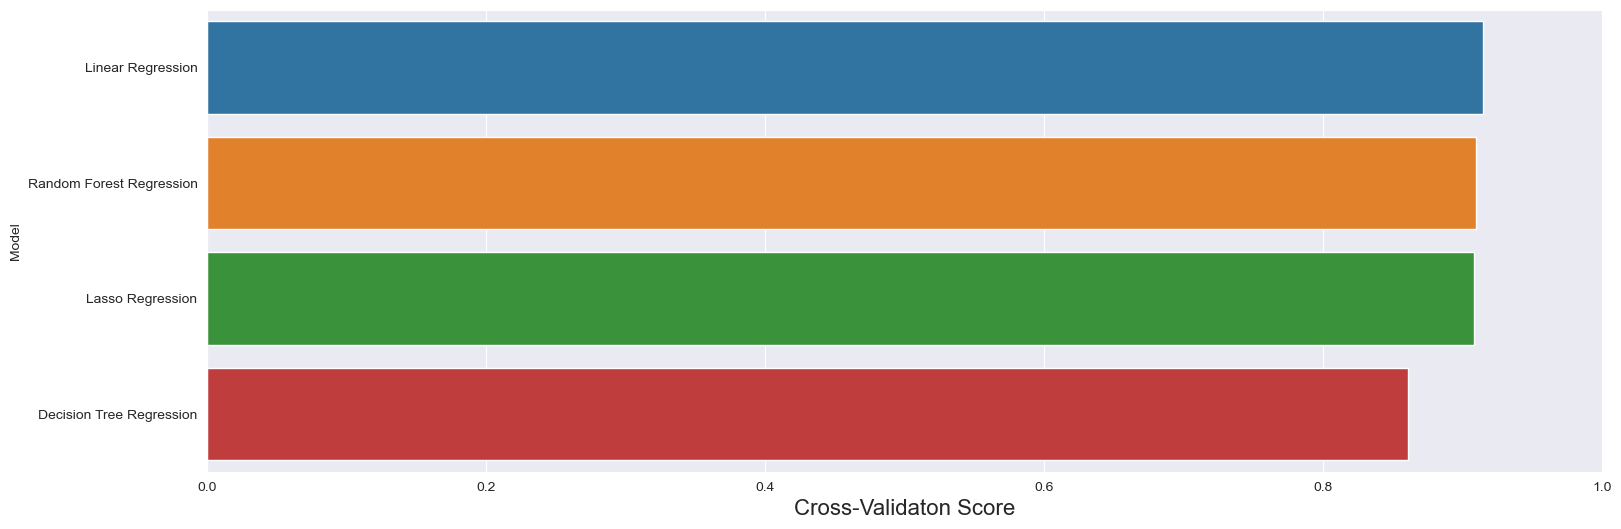

In [163]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

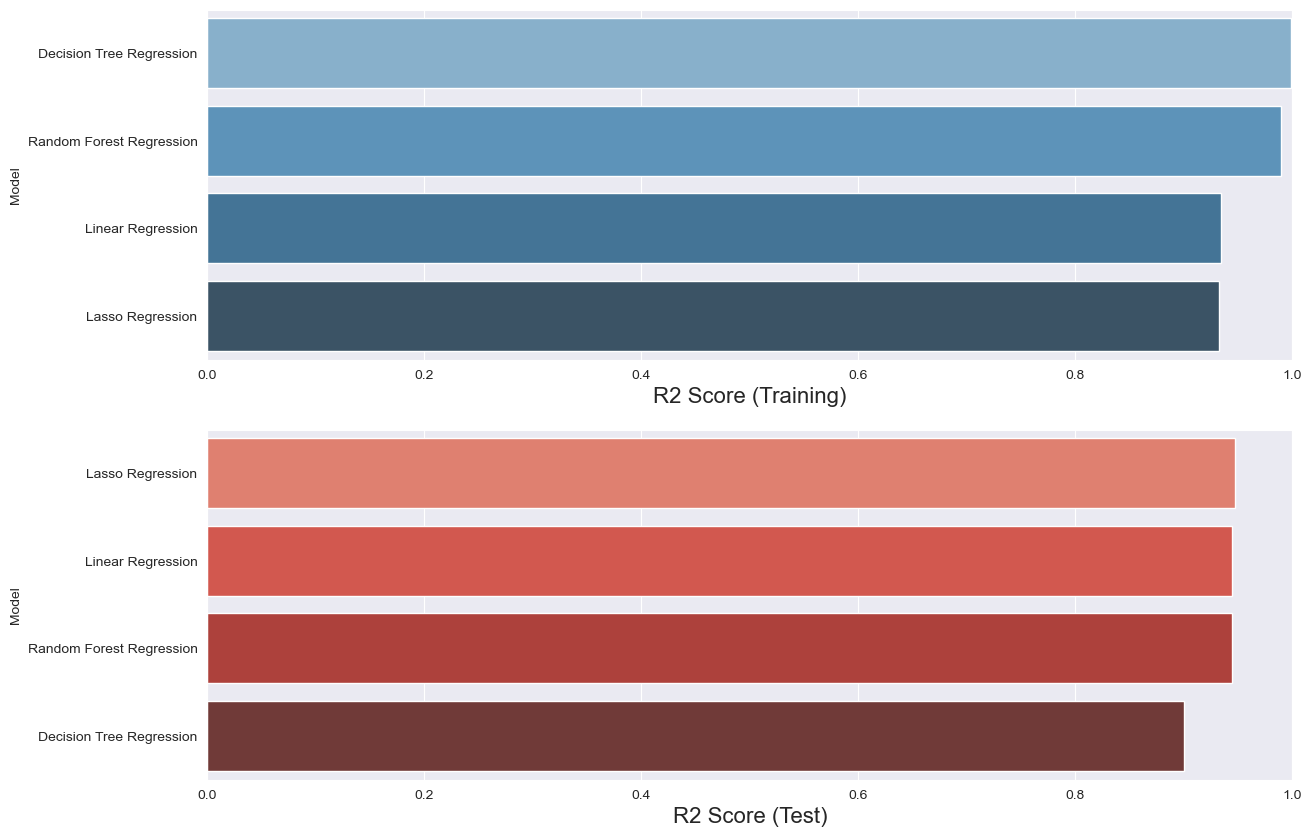

In [164]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

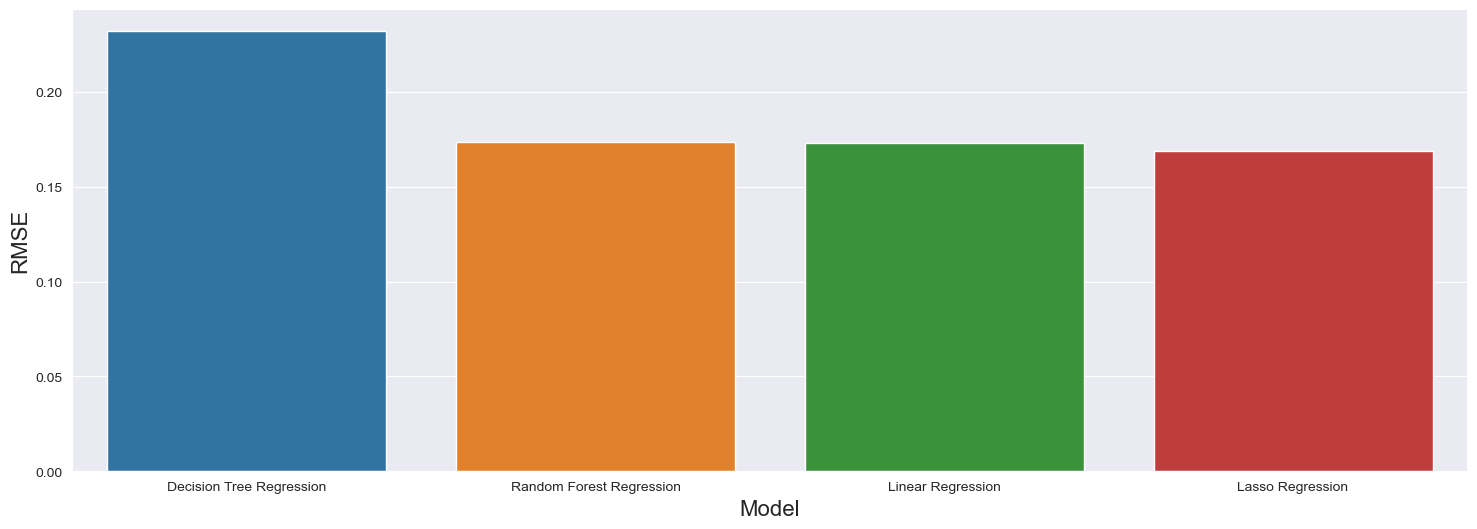

In [165]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [167]:
X = iris.data
y = iris.target

In [168]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

In [169]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [170]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [171]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [172]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Classification_Report

In [173]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Tensorflow

In [174]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [175]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units for the 3 classes
])

In [177]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [178]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
4/4 [==============================] - 1s 88ms/step - loss: 1.0453 - accuracy: 0.3917 - val_loss: 0.9919 - val_accuracy: 0.5333
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.9854 - accuracy: 0.5333 - val_loss: 0.9279 - val_accuracy: 0.7333
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.9301 - accuracy: 0.6417 - val_loss: 0.8684 - val_accuracy: 0.7333
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.8791 - accuracy: 0.7000 - val_loss: 0.8144 - val_accuracy: 0.7667
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.8309 - accuracy: 0.7333 - val_loss: 0.7659 - val_accuracy: 0.8000
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.7896 - accuracy: 0.7583 - val_loss: 0.7213 - val_accuracy: 0.8000
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.7503 - accuracy: 0.7833 - val_loss: 0.6812 - val_accuracy: 0.8333
Epoch 8/50
4/4 [===========

In [179]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"Accuracy on the test set: {accuracy}")

1/1 [==============================] - 0s 37ms/step - loss: 0.2198 - accuracy: 0.9667
Accuracy on the test set: 0.9666666388511658


# Conclusion

### For the Iris dataset 🌸 traditionally used for classification, attempting regression is less common. If pursuing regression, consider traditional models like Linear Regression or Support Vector Regression, and experiment with TensorFlow by modifying neural network architecture. Evaluate and choose the model that best fits the specific goals and characteristics of your dataset. I have built 6 regression models using Iris Dataset. These are linear, lasso,  svr, decision tree and random forest regression, logistic regression. Then measured and visualized the performance of the models.  thank you. 📊🤖